In [1]:
import pandas as pd
data = pd.DataFrame({'Math':[70,60,40,80,30],
                     'Chemistry':[60,80,65,55,60],
                     'Maths':[70,60,40,80,30],
                     'Physics':[50,50,50,50,50],
                     'General_Test':[70,70,60,60,80]})
print(data)

   Math  Chemistry  Maths  Physics  General_Test
0    70         60     70       50            70
1    60         80     60       50            70
2    40         65     40       50            60
3    80         55     80       50            60
4    30         60     30       50            80


variance

In [2]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
selected_features = selector.fit_transform(data)


In [3]:
data = pd.DataFrame(selected_features, columns=selector.get_feature_names_out())
data

,Math,Chemistry,Maths,General_Test
0,70,60,70,70
1,60,80,60,70
2,40,65,40,60
3,80,55,80,60
4,30,60,30,80


Correlation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cor = data.corr()
cor

,Math,Chemistry,Maths,General_Test
Math,1.000000,-0.150424,1.000000,-0.489932
Chemistry,-0.150424,1.000000,-0.150424,0.124274
Maths,1.000000,-0.150424,1.000000,-0.489932
General_Test,-0.489932,0.124274,-0.489932,1.000000


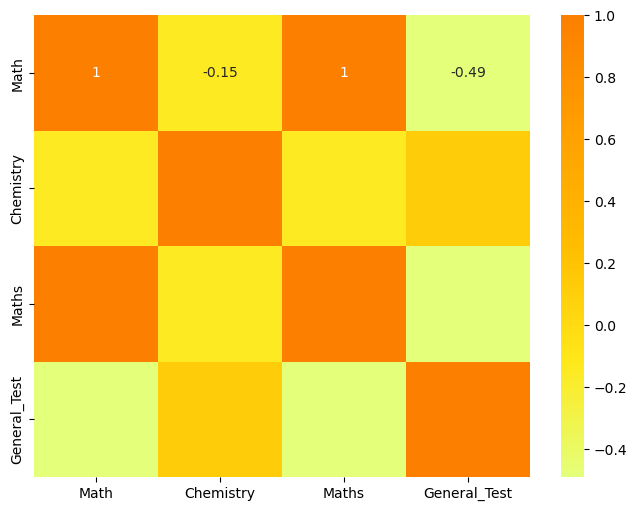

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='Wistia')
plt.show()

In [7]:
#remove columns
corr_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i,j]) > 0.9:
            colname = cor.columns[i]
            corr_features.add(colname)

In [8]:
corr_features

{'Maths'}

In [9]:
data.drop(corr_features, axis=1)
data

,Math,Chemistry,Maths,General_Test
0,70,60,70,70
1,60,80,60,70
2,40,65,40,60
3,80,55,80,60
4,30,60,30,80
